# Data Scientist Professional Practical Exam Submission



## 📝 Task List

- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake



# Data Validation
  The data set contains 947 rows and 8 columns. I have reviewed all of the variables and have made some modifications based on the validation results. Specifically, the following changes were made :
  
-   calories: numeric value, with 52 missing values. I imputed the missing values with the mean calories of their respective categories.
-   carbohydrate: numeric value, with 52 missing values. I imputed the missing values with the mean carbohydrate of their respective categories.
-   sugar: numeric value, with 52 missing values. I imputed the missing values with the mean sugar of their respective categories.
-   protein: numeric value, with 52 missing values. I imputed the missing values with the mean protein of their respective categories.
-   category: 11 categories, without missing values. I renamed the category 'Chicken breast' to 'Chicken', which brings it to 10 categories same as listed in the data dictionary.
-   servings: non-numeric value, without missing values. I replaced the expressions '4 as a snack' and '6 as a snack' respectively by 4 and 6. Then i converted the column type to integer, in other to make it  numeric.
-   high-traffic: same as the description. But i replaced the null values by "Low", to avoid ambiguity. Hence no missing values declared. 
-   recipe: numeric value, no missing values. No cleaning needed

Once I validated each column, I removed any duplicate rows that arose as a result of the imputations and I designated the 'recipe' column as the index column. This resulted in a final dataset comprising of 922 rows and 7 columns.


In [2]:
#dataset discovery...

import pandas as pd
recipe_site_traffic_2212 = pd.read_csv('recipe_site_traffic_2212.csv')
display(recipe_site_traffic_2212.info())
display(recipe_site_traffic_2212.describe())
display(recipe_site_traffic_2212.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


None

,recipe,calories,carbohydrate,sugar,protein
count,947.000000,895.000000,895.000000,895.000000,895.000000
mean,474.000000,435.939196,35.069676,9.046547,24.149296
std,273.519652,453.020997,43.949032,14.679176,36.369739
min,1.000000,0.140000,0.030000,0.010000,0.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000
50%,474.000000,288.550000,21.480000,4.550000,10.800000
75%,710.500000,597.650000,44.965000,9.800000,30.200000
max,947.000000,3633.160000,530.420000,148.750000,363.360000


,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN
5,6,691.15,3.46,1.65,53.93,One Dish Meal,2,High
6,7,183.94,47.95,9.75,46.71,Chicken Breast,4,NaN
7,8,299.14,3.17,0.40,32.40,Lunch/Snacks,4,NaN
8,9,538.52,3.78,3.37,3.79,Pork,6,High
9,10,248.28,48.54,3.99,113.85,Chicken,2,NaN


In [3]:
# proceed with data validation steps...
# import necessary libraries
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#display(recipe_site_traffic_2212)
# changing the 'servings' column type into 'int' type..

recipe_site_traffic_2212['servings'].replace({'4 as a snack':'4', '6 as a snack':'6' }, inplace = True)

recipe_site_traffic_2212['servings'] = recipe_site_traffic_2212['servings'].astype(int)

# changing the categorical 'chiken breast' into 'chiken'...
recipe_site_traffic_2212['category'].replace({ 'Chicken Breast' :'Chicken' }, inplace = True)


# missing values...
# convert the null values in traffic column to 'low'...
recipe_site_traffic_2212['high_traffic'].replace({ np.nan :'Low' }, inplace = True)

# impute the missing values in the numerical columns with the mean of their respective categoy
l = []
categories =['Pork', 'Meat', 'Chicken',  'Dessert',  'Potato', 'Lunch/Snacks', 'One Dish Meal', 'Vegetable', 'Beverages', 'Breakfast']
for val  in categories: 
    df = recipe_site_traffic_2212[recipe_site_traffic_2212['category'] == val ]
    df.fillna(df.mean().round(2), inplace = True)
    l.append(df)
   
recipe_site_traffic_2212_updated = pd.concat(l, axis= 0)
recipe_site_traffic_2212_updated.sort_values('recipe', inplace = True)
 
display(recipe_site_traffic_2212_updated.isna().sum())

# remove duplicates ...
recipe_site_traffic_2212_updated.drop_duplicates(['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic'], inplace=True)
recipe_site_traffic_2212_updated.set_index('recipe', inplace=True) 


display(recipe_site_traffic_2212_updated)

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,629.71,28.08,8.04,43.80,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,Low
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,Low
...,...,...,...,...,...,...,...
942,186.21,83.94,1.98,22.40,Chicken,4,High
943,1161.00,5.31,22.39,44.22,Lunch/Snacks,2,Low
945,951.74,29.42,3.57,13.87,Pork,2,High


# Exploratory Analysis

I have examined the recipe's target variable and its features, and analyzed their relationship. However, I found that no changes were necessary for the newly obtained dataset after completing the investigation. Details of my findings are provided below.

### Target Variable - high_traffic

Given that our goal is to predict whether a recipe will be popular or not, and popularity implies more traffic and subscriptions, the target variable for our analysis would be the 'high_traffic' variable.

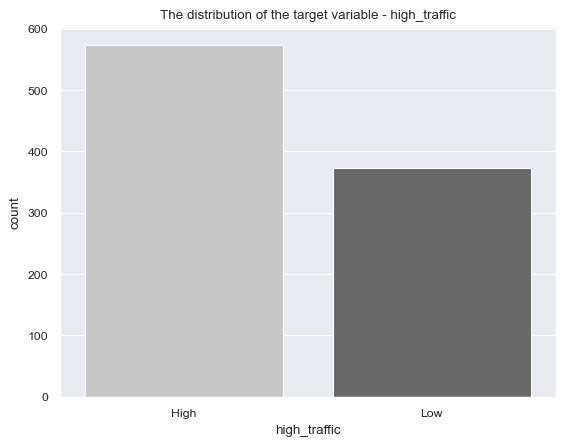

In [32]:
# target variable - high-traffic
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1)
sns.countplot(x='high_traffic', data = recipe_site_traffic_2212, palette= 'Greys')
plt.title('The distribution of the target variable - high_traffic')
plt.show()

### Numeric Variable - Calorie, Carbohydrate, Sugar, Protein, Servings

The heatmap suggests that there is a slight positive linear relationship between two pairs of variables: protein and calories, as well as sugar and carbohydrates.

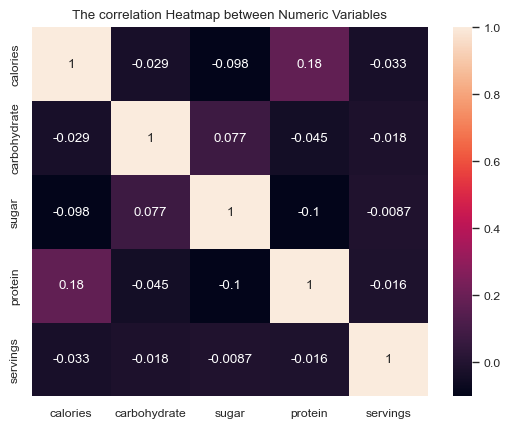

In [33]:
# numeric variable ...
num_col = ['calories', 'carbohydrate','sugar', 'protein', 'servings' ]
corr_mat = recipe_site_traffic_2212_updated[num_col].corr()
sns.set_context('paper', font_scale=1)
sns.heatmap(corr_mat, annot=True )
plt.title('The correlation Heatmap between Numeric Variables')
plt.show()

### Relationship between Calorie, Carbohydrate, Sugar, Protein and high_traffic


To look deeper into this relationship, I started by creating boxplots to investigate the connection between Calories, Carbohydrates, Sugar, Proteins, and our target variable, high_traffic. Based on the boxplots below, it appears that foods rich in calories and carbohydrates are more likely to attract traffic.

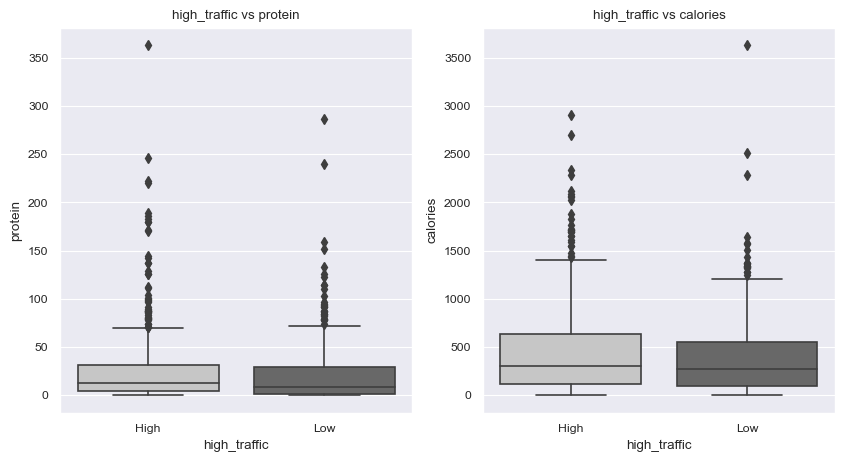

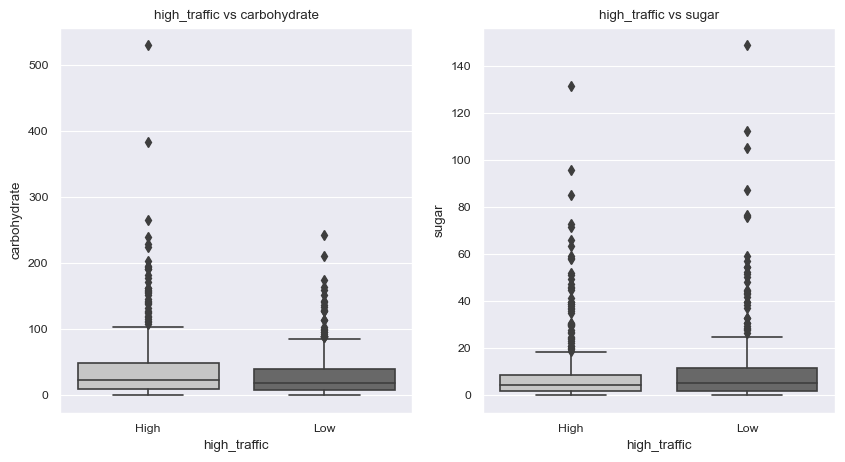

In [34]:
# relation between the target variable and numeric variable
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1)
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
sns.boxplot(x='high_traffic', y='protein', data = recipe_site_traffic_2212, palette= 'Greys', ax=ax0)
ax0.set(title ='high_traffic vs protein')
sns.boxplot(x='high_traffic', y='calories', data = recipe_site_traffic_2212, ax=ax1, palette= 'Greys')
ax1.set(title ='high_traffic vs calories')
plt.show()

fig, (ax2, ax3) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(10,5))
sns.boxplot(x='high_traffic', y='carbohydrate', data = recipe_site_traffic_2212, palette= 'Greys', ax=ax2)
ax2.set(title ='high_traffic vs carbohydrate')
sns.boxplot(x='high_traffic', y='sugar', data = recipe_site_traffic_2212, palette= 'Greys', ax=ax3)
ax3.set(title ='high_traffic vs sugar')
plt.show()


   To provide further clarity, I included scatter plots that depict the food composition by category. These scatter plots reinforce the previous observation and provide additional insights, such as: pork, meat, vegetables, and potatoes are popular meals, while breakfast and beverages are less likely to generate traffic.

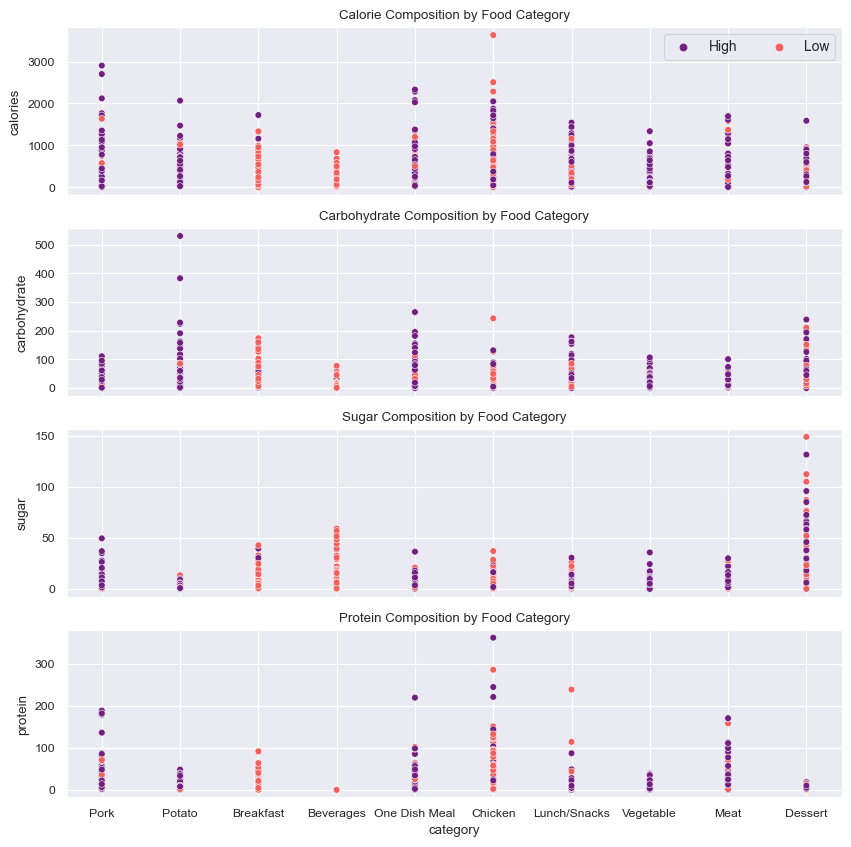

In [35]:
# category vs calories ....
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1)
fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10,10))
sns.scatterplot(x='category',y='calories', data = recipe_site_traffic_2212, hue= 'high_traffic', ax=ax0, palette='magma' )
ax0.set(title ='Calorie Composition by Food Category', xlabel='')
ax0.legend(loc= 'upper right', ncol=2, fontsize=10)
sns.scatterplot(x='category',y='carbohydrate', data = recipe_site_traffic_2212, hue= 'high_traffic', ax=ax1, palette='magma', legend=False )
ax1.set(title ='Carbohydrate Composition by Food Category', xlabel='')
sns.scatterplot(x='category',y='sugar', data = recipe_site_traffic_2212, hue= 'high_traffic', ax=ax2, palette='magma', legend=False )
ax2.set(title ='Sugar Composition by Food Category', xlabel='')
sns.scatterplot(x='category',y='protein', data = recipe_site_traffic_2212, hue= 'high_traffic', ax=ax3, palette='magma', legend=False )
ax3.set(title ='Protein Composition by Food Category')
plt.show()


## Categorical Variables - Servings, Category

Looking at the bar plot below, we can see that chicken is the most frequently ordered meal, followed by breakfast and beverages. However, it is important to note that popularity is not necessarily implied by frequency. Additionally, the majority of recipes seem to serve four people, which could potentially lead to humorous thoughts of double dates.

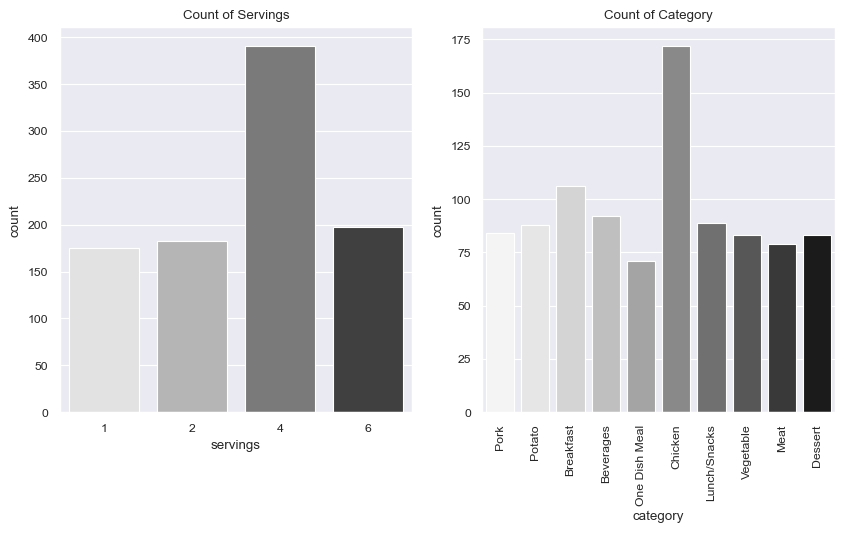

In [36]:
# vizualisations of categorical variable...
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(10,5))
sns.countplot(x='servings', data = recipe_site_traffic_2212, ax=ax0, palette='Greys' )
ax0.set(title ='Count of Servings')
sns.countplot(x='category', data = recipe_site_traffic_2212, ax=ax1, palette='Greys' )
ax1.set(title ='Count of Category')
plt.xticks(rotation = 90)
plt.show()

# Model Fitting & Evaluation

To forecast the popularity of a recipe, we need to predict the "high_traffic" variable, which poses a **classification problem** in machine learning. Based on the strong to moderate correlation between certain features and the target variable, I have opted to use the **Logistic Regression model as a baseline model**. In addition, I have selected the **Decision Tree Classifier model as a comparison model** due to its simplicity of interpretation and ability to function independently of outliers.

To assess the model's performance, I have decided to use the metrics of **accuracy** and **precision**. Accuracy determines the frequency with which the model produces correct predictions for all intances, regardless of whether they are positive (high traffic) or negative(low traffic). While precision measures the frequency at which the model accurately anticipates a positive instance, in this case high traffic.

## Prepare the Data for Modelling

To facilitate the modeling process, I initially transformed the categorical variable "category" into a numerical variable, using one-hot encoding. And rename the target variable
'high_traffic' to True for 'High' and false for 'Low'.

In [37]:
# transforming the category variable to numeric variables...
encoded = pd.get_dummies(recipe_site_traffic_2212_updated['category'])
recipe_site_traffic_2212_updated_encoded = pd.concat([recipe_site_traffic_2212_updated, encoded], axis = 1)
recipe_site_traffic_2212_updated_encoded.drop("category", axis=1, inplace = True)

# transforming the high_traffic variable into a boolean variable...
# Use the .cat() method to set the categories of the 'color' column
recipe_site_traffic_2212_updated_encoded['high_traffic'] = recipe_site_traffic_2212_updated_encoded['high_traffic'].astype('category')
recipe_site_traffic_2212_updated_encoded['high_traffic'].cat.categories = ['High', 'Low']

# Use the .rename() method of the .cat() attribute to rename categories
recipe_site_traffic_2212_updated_encoded['high_traffic'] = recipe_site_traffic_2212_updated_encoded['high_traffic'].cat.rename_categories({'High': 'True', 'Low': 'False'})

display(recipe_site_traffic_2212_updated_encoded)


,calories,carbohydrate,sugar,protein,servings,high_traffic,Beverages,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
recipe,,,,,,,,,,,,,,,,
1,629.71,28.08,8.04,43.80,6,True,0,0,0,0,0,0,0,1,0,0
2,35.48,38.56,0.66,0.92,4,True,0,0,0,0,0,0,0,0,1,0
3,914.28,42.68,3.09,2.88,1,False,0,1,0,0,0,0,0,0,0,0
4,97.03,30.56,38.63,0.02,4,True,1,0,0,0,0,0,0,0,0,0
5,27.05,1.85,0.80,0.53,4,False,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
942,186.21,83.94,1.98,22.40,4,True,0,0,1,0,0,0,0,0,0,0
943,1161.00,5.31,22.39,44.22,2,False,0,0,0,0,1,0,0,0,0,0
945,951.74,29.42,3.57,13.87,2,True,0,0,0,0,0,0,0,1,0,0


By excluding the **high_traffic** column as the target variable, the feature variables were selected from all other columns. This resulted in the selection of **calories, carbohydrate, sugar, protein, servings, Beverages, Breakfast, Chicken, Dessert, Lunch/Snacks, Meat, One Dish Meal, Pork, Potato, Vegetable** as the features. The dataset was then split into training and testing sets, and the features were scaled as a final step.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assume your data is stored in a pandas DataFrame called 'data'
X = recipe_site_traffic_2212_updated_encoded.drop('high_traffic', axis=1).values  # Features
y = recipe_site_traffic_2212_updated_encoded['high_traffic'].values # Target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Logistic Regression Model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Create a logistic regression object
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train_scaled, y_train)

# Predict the target variable for the test data
y_pred = logreg.predict(X_test_scaled)

# Generate predicted probalities for some test data
y_prob_pred = logreg.predict_proba(X_test_scaled)

# Convert the binary labels to strings
y_test = y_test.astype(str)
y_pred = y_pred.astype(str)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='True')

print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression Precision:", precision)


Logistic Regression Accuracy: 0.7351351351351352
Logistic Regression Precision: 0.8090909090909091


### Finding the feature importance 

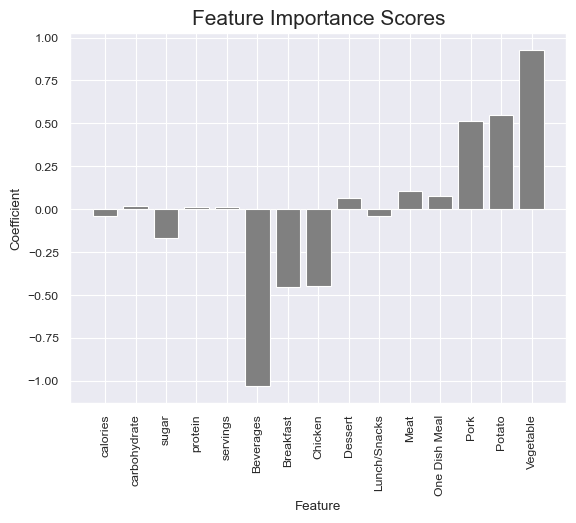

In [12]:
# Get the coefficients of the model
list_ = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings', 'Beverages', 'Breakfast', 'Chicken', 'Dessert',
       'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato', 'Vegetable'] 

coef = logreg.coef_[0]

# Create a bar plot of the feature importance scores
plt.bar(range(len(coef)), coef, color='grey')
plt.xticks(range(len(coef)), list_, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance Scores', fontsize= 15)
plt.show()



### Interpretation
The logistic regression model highlights the importance of the features **pork, potato, and vegetable** in positively predicting high traffic, and the impact of the features **Beverages, breakfast, and Chicken** in negatively predicting low traffic. Overall, these six features play an active role in predicting popular recipes.

### Decision Tree Classification Model 

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Create a logistic regression object
dtc = DecisionTreeClassifier(max_depth = 12, random_state = 1)

# Fit the model to the training data
dtc.fit(X_train_scaled, y_train)

# Predict the target variable for the test data
y_pred = dtc.predict(X_test_scaled)

# Convert the binary labels to strings
y_test = y_test.astype(str)
y_pred = y_pred.astype(str)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label = 'True')

print("Decision Tree Classifier accuracy:", accuracy)
print("Decision Tree Classifier precision:", precision)

Decision Tree Classifier accuracy: 0.7081081081081081
Decision Tree Classifier precision: 0.7603305785123967


### Finding feature importance

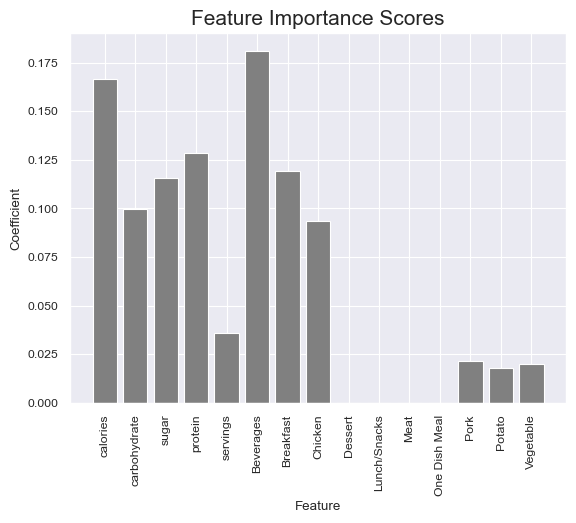

In [14]:
# Get the coefficients of the model
list_ = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings', 'Beverages', 'Breakfast', 'Chicken', 'Dessert',
       'Lunch/Snacks', 'Meat', 'One Dish Meal', 'Pork', 'Potato', 'Vegetable'] 

coef = dtc.feature_importances_

# Create a bar plot of the feature importance scores
plt.bar(range(len(coef)), coef, color='grey')
plt.xticks(range(len(coef)), list_, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.title('Feature Importance Scores', fontsize= 15)
plt.show()


### Interpretation
In the decision making tree, the features **calories, carbohydrate, sugar, protein, servings, Beverages, Breakfast,** and **Chicken** stand out as particularly important in predicting the target variable of high traffic.

## Results

The Logistic Regression model achieved an accuracy score of 0.735, while the Decision Tree classification model achieved a score of 0.708, **indicating that the Logistic Regression model produced more accurate results**. Additionally, the precision score of the Logistic Regression model was 0.809, compared to 0.760 for the Decision Tree Classification model. Therefore, **the Logistic Regression model is better at predicting the occurrence of high_traffic**.

### Evaluate by Business Criteria


The company's main objective is to predict recipes that generate high traffic with a precision of at least 80%. After assessing various models, the Logistic Regression model was found to be the most suitable, with a precision of 0.809 and an accuracy of 0.735, both of which exceed those of the Decision Tree Classifier model. Moreover, the Logistic Regression model helps minimize the risk of displaying unpopular recipes, which is critical for enhancing user satisfaction. This makes it the preferred model for determining which recipes to feature on the home page of the **Tasty Bytes** site.

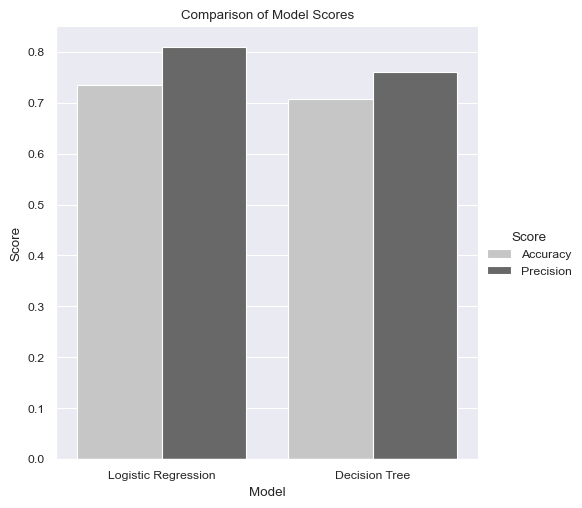

In [43]:
# Define the data
models = ['Logistic Regression', 'Decision Tree']
accuracy = [0.735, 0.708]
precision = [0.809, 0.760]

# Convert the data to a pandas DataFrame
df = pd.DataFrame({'Model': models, 'Accuracy': accuracy, 'Precision': precision})

# Melt the DataFrame to "long" format
df = pd.melt(df, id_vars=['Model'], var_name='Score', value_name='Value')

# Create the bar chart using seaborn
sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1)
sns.catplot(x='Model', y='Value', hue='Score', data=df, kind='bar', palette='Greys')
plt.ylabel('Score')
plt.title('Comparison of Model Scores')

# Display the chart
plt.show()

## Recommendation

In order to overcome potential difficulties in the future, we can implement a Logistic Regression Model into production to improve recipe prediction accuracy. With an expected precision of 80%, this model has the potential to increase site subscriptions, which could eventually lead to a boost in the company's revenue. To ensure successful deployment and ongoing improvement of the model, I recommend the following steps:

1. Identify and fix any errors to improve accuracy and precision after testing, by collecting feedback from users and monitoring its performance. Use this feedback to update and retrain the model, adding new features.

2. Deploy the model using more efficient strategies, such as a mobile application or API.

3. Continuously improve the model by collecting more data, feature engineering, and fine-tuning parameters. This will address any limitations posed by variables such as Lunch/Snacks, One Dish Meal, protein and other.